# Вариант 13, задания 4.1.13, 4.2, 4.4.7, 4.8.3 

## Задача 4.1.13
### Дана система уравнений Ax=b. Найти решение системы с помощью метода Гаусса. Выполнить 10 итераций по методу Зейделя. Принимая решение, полученное с помощью метода Гаусса за точное, найти величину абсолютной погрешности итерационного решения. 

### Матрица А:
\begin{bmatrix}
    2.97 & 0.4 & 0.3 & 1.98 & 0 & 0.1\\
    0.99 & 4.9 & 0.4 & 2.97 & 0.2 & -0.3\\
    0 & -1.8 & 6.6 & 3.3 & 0.6 & 0.8\\
    4.95 & 1.6 & 1.2 & 8.91 & 0.8 & 0.3\\
    1.98 & -1.5 & 0.4 & -1.98 & 6.1 & 0\\
    9.9 & 1.4 & 2.4 & 5.94 & 3.2 & 23.3\\
\end{bmatrix}

### Вектор b:
\begin{bmatrix}
4.69\\
12.18\\
-3.64\\
21.05\\
0.42\\
-13.91\\
\end{bmatrix}

In [1]:
import numpy as np

In [3]:
A = np.array([[2.97, 0.4, 0.3, 1.98, 0, 0.1],
               [0.99, 4.9, 0.4, 2.97, 0.2, -0.3],
               [0, -1.8, 6.6, 3.3, 0.6, 0.8],
               [4.95, 1.6, 1.2, 8.91, 0.8, 0.3],
               [1.98, -1.5, 0.4, -1.98, 6.1, 0],
               [9.9, 1.4, 2.4, 5.94, 3.2, 23.3]
               ])
b = np.array([4.69, 12.18, -3.64 ,21.05, 0.42, -13.91])

In [4]:
x_gauss = np.linalg.solve(A,b)

In [5]:
D = np.zeros(A.shape)
D_inverse = np.zeros(A.shape)
for i in range(A.shape[0]):
    D[i][i] = A[i][i]
    D_inverse[i][i] = 1/A[i][i]
B = np.dot(D_inverse,D - A)
c = np.dot(D_inverse,b)

### Проверим выполнение достаточного условия сходимости итерационных методов ||B||$_\infty$ < 1

In [6]:
B_norm = np.linalg.norm(B, ord = np.inf)
B_norm

0.9932659932659934

### Реализуем метод Якоби и проверим его на нескольких примерах. 

In [7]:
def Yacobi(x_0, B, c, B_norm = B_norm, eps = 1e-6, it_num = None):
    if B_norm > 0.5:
        eps = (1 - B_norm)/B_norm * eps
    counter = 0
    x_curr = x_0
    x_next = np.dot(B,x_curr) + c
    while counter != it_num and np.max(np.abs(x_next - x_curr)) > eps:
        x_curr = x_next
        counter += 1
        x_next = np.dot(B,x_curr) + c
    if counter == it_num:
        print("Max it num achieved")
    else: print("Target accuracy achieved in ", counter, " steps")
    return x_next

### Выполним 10 итераций методом Якоби для 2 разных начальных приближений и вычислим абсолютную погрешность.

In [8]:
x_0 = np.ones(A.shape[0])
x_yacobi_1 = Yacobi(x_0, B, c, it_num=10)
abs_err_1 = np.max(np.abs(x_yacobi_1 - x_gauss))
abs_err_1

Max it num achieved


0.02942390087410196

In [9]:
x_0 = np.zeros(A.shape[0])
x_yacobi_2 = Yacobi(x_0, B, c, it_num=10)
abs_err_2 = np.max(np.abs(x_yacobi_2 - x_gauss))
abs_err_2

Max it num achieved


0.1222964748714748

### Посмотрим, за сколько шагов необходимо методу Якоби с теми же начальными приближениями для достижения точности ε = $10^{-6}$

In [10]:
x_0 = np.ones(A.shape[0])
x_yacobi_1_2 = Yacobi(x_0, B, c)
x_0 = np.zeros(A.shape[0])
x_yacobi_2_2 = Yacobi(x_0, B, c)

Target accuracy achieved in  92  steps
Target accuracy achieved in  100  steps


### Реализуем метод Зейделя

In [11]:
from scipy.linalg import solve_triangular
def Zeidel(A, b, x0, eps = 1e-6, it_num = None):
    L = np.tril(A, k = -1)
    D = np.diag(np.diag(A))
    U = np.triu(A, k = 1)
    L_D_inv = solve_triangular(L+D,np.eye(A.shape[0]), lower = True)
    counter = 0
    x_curr = x0
    x_next = -np.dot(np.dot(L_D_inv,U),x_curr) + np.dot(L_D_inv,b)
    while counter != it_num and np.max(np.abs(x_next - x_curr)) > eps:
        x_curr = x_next
        counter += 1
        x_next = -np.dot(np.dot(L_D_inv,U),x_curr) + np.dot(L_D_inv,b)
    if counter == it_num:
        print("Max it num achieved")
    else: print("Target accuracy achieved in ", counter, " steps")
    return x_next

### Выполним 10 итераций методом Зейделя для 2 разных начальных приближений и вычислим абсолютную погрешность

In [12]:
x_0 = np.ones(A.shape[0])
x_zeidel_1 = Zeidel(A, b, x_0, it_num=10)
abs_err_1 = np.max(np.abs(x_zeidel_1 - x_gauss))
abs_err_1

Max it num achieved


1.6037669827717593e-06

In [13]:
x_0 = np.zeros(A.shape[0])
x_zeidel_2 = Zeidel(A, b, x_0, it_num=10)
abs_err_2 = np.max(np.abs(x_zeidel_2 - x_gauss))
abs_err_2

Max it num achieved


3.076950309877091e-06

In [14]:
x_0 = -x_gauss
x_zeidel_3 = Zeidel(A, b, x_0, it_num=10)
abs_err_3 = np.max(np.abs(x_zeidel_3 - x_gauss))
abs_err_3

Max it num achieved


6.1539006201982716e-06

### Можно заметить, что во всех трёх случаях достигнута точность $10^{-5}$

## Задача 4.2.
### Для системы уравнений Ax=b из задачи 4.1 найти решение по методу Зейделя с точностью ε=$10^-6$ , взяв любое начальное приближение. Предусмотреть подсчет количества итераций, потребовавшихся для достижения точности ε. 

In [15]:
x_0 = np.ones(A.shape[0])
print("For initial approximation = ", x_0)
x_zeidel_1_2 = Zeidel(A, b, x_0)
x_0 = np.zeros(A.shape[0])
print("For initial approximation = ", x_0)
x_zeidel_2_2 = Zeidel(A, b, x_0)
x_0 = -x_gauss
print("For initial approximation = ", x_0)
x_zeidel_3_2 = Zeidel(A, b, x_0)

For initial approximation =  [1. 1. 1. 1. 1. 1.]
Target accuracy achieved in  12  steps
For initial approximation =  [0. 0. 0. 0. 0. 0.]
Target accuracy achieved in  12  steps
For initial approximation =  [-0.13131313 -1.1         1.3        -2.21212121 -1.1         1.3       ]
Target accuracy achieved in  13  steps


## Задание 4.4.7
### Дана система уравнений x=Bx+c, где B=B(t), t =− −1, −0.8,...,0.8,1 - параметр. Построить график (или гистограмму) зависимости нормы || B ||$_\infty$  от параметра t. По графику определить, при каких перечисленных выше значениях t выполнено достаточное условие сходимости итерационных методов. Найти решение системы x=Bx+c с точностью ε = $10^{-5}$ для наибольшего значения параметра t, при котором выполнено условие сходимости.
### Матрица B(t):
\begin{bmatrix}
    2t & 0.12 & 0.5 & -0.1\\
    -0.1 & -0.15 & -0.01 & -0.4\\
     0.15 & 0 & 0.3 & 0.2\\
    0 & -0.1 & 0.25 & 0.1\\
\end{bmatrix}
### Вектор c :
\begin{bmatrix}
   3\\
   2\\
   1\\
   0\\
\end{bmatrix}

In [163]:
B = np.array([[0,0.12,0.5,-0.1],[-0.1, -0.15, -0.01, -0.4],[0.15, 0, 0.3, 0.2],[0, -0.1, 0.25, 0.1]])
c = np.array([3,2,1,0])
param_t = np.arange(-1,1.2,0.2)
B_norm_arr = []
for t in param_t:
    B[0][0] = 2*t
    B_norm_arr.append(np.linalg.norm(B,ord= np.inf))

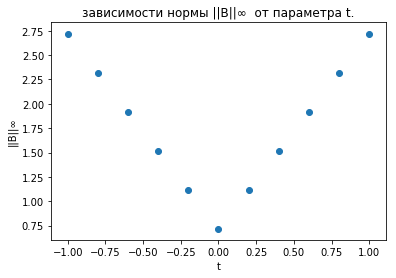

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(param_t,B_norm_arr)
plt.title("зависимости нормы ||B||∞  от параметра t.")
plt.xlabel("t")
plt.ylabel("||B||∞");

### Получилось, что достаточное условие сходимости итерационных методов выполнено только при t = 0. Найдём решение системы.

In [161]:
x_0 = np.zeros(c.shape)
B[0][0] = 0
answer = Yacobi(x_0,B,c, B_norm = B_norm_arr[5], eps = 1e-5)

Target accuracy achieved in  21  steps


### Проверим точность полученного решения, посчитав норму x - Bx - c

In [162]:
print(np.linalg.norm(answer - np.dot(B,answer) - c, ord = np.inf))

1.5919048610424369e-06


### Полученная норма <$10^{-5}$, как мы и хотели

## Задача 4.8.3*
### Дана система уравнений Ax=b, где A – симметричная положительно определенная матрица размерности n х n. Найти решение системы с помощью явного и неявного нестационарных методов с чебышевским набором параметров с точностью ε=$10^{-6}$. Сравнить скорость сходимости методов.

In [20]:
n = 40
m = 1
t_m = m + n
q_m = 1.05 + (-1)**m*m*10**(-2)
q = np.array([q_m**(i+1) for i in range(n)])
tau = np.sum([q_m**(2*i+2) for i in range(n)])
b = np.array([tau + 3*q[i] for i in range(n)])
A = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        if i == j:
            A[i][j] = 2 * q[i] * t_m**2
        else:
            A[i][j] = 2 * tau + (q[i] + q[j]) * t_m

In [127]:
B = np.diag(np.diag(A))
B_inv = np.diag(1/np.diag(B))

### Зададим необходимые параметры для явного метода (для неявного они схожи, поэтому их поправки сделаны внутри функции)

In [111]:
lambda_vec = np.linalg.eigvals(A)
l_max,l_min = max(lambda_vec), min(lambda_vec)
tau_0 = 2/(l_max + l_min)
ksi = l_min/l_max
p_0 = (1 - ksi)/(1+ksi)

In [143]:
def explicit_method(x0, b, A, eps = 1e-6, l_max = l_max, l_min = l_min, tau_0 = tau_0, ksi = ksi, p_0 = p_0, max_it = 100):
    counter = 1
    t_k = np.array([np.cos((2*k + 1) * np.pi/2/max_it) for k in range(max_it)])
    tau = np.array([tau_0 /(1 + p_0 * t_k[i]) for i in range(max_it)])
    x_curr = x0
    x_next = tau[0] * (b - np.dot(A,x_curr)) + x_curr
    while np.linalg.norm(x_next - x_curr, ord = np.inf) > eps and counter != max_it:
        x_curr = x_next
        x_next = tau[counter] * (b - np.dot(A,x_curr)) + x_curr
        counter += 1
    if counter == max_it:
        print("Max it num achieved")
    else: print("Target accuracy achieved in ", counter, " steps")
    return x_next

def implicit_method(x_0, b, A, B_inv, eps = 1e-6, max_it = 100):
    lambda_vec = np.linalg.eigvals(np.dot(B_inv,A))
    l_max,l_min = max(lambda_vec), min(lambda_vec)
    tau_0 = 2/(l_max + l_min)
    ksi = l_min/l_max
    p_0 = (1 - ksi)/(1+ksi)
    counter = 0
    t_k = np.array([np.cos((2*k + 1) * np.pi/2/max_it) for k in range(max_it)])
    tau = np.array([tau_0 /(1 + p_0 * t_k[i]) for i in range(max_it)])
    x_curr = x0
    x_next = np.dot(B_inv,tau[counter]*(b - np.dot(A,x_curr))) + x_curr
    counter += 1
    while np.linalg.norm(x_next - x_curr, ord = np.inf) > eps and counter != max_it:
        x_curr = x_next
        x_next = np.dot(B_inv,tau[counter]*(b - np.dot(A,x_curr))) + x_curr
        counter += 1
    if counter == max_it:
        print("Max it num achieved")
    else: print("Target accuracy achieved in ", counter, " steps")
    return x_next


### Найдём решения с помощью явного и неявного нестационарных методов с чебышевским набором параметров и посмотрим, за сколько итераций они сходятся

In [155]:
x0 = np.ones(b.shape)
sol_cheb_explicit = explicit_method(x0, b, A)
sol_cheb_implicit = implicit_method(x0, b, A, B_inv)

Target accuracy achieved in  75  steps
Target accuracy achieved in  57  steps


In [169]:
x0 = np.zeros(b.shape)
sol_cheb_explicit = explicit_method(x0, b, A)
sol_cheb_implicit = implicit_method(x0, b, A, B_inv)

Target accuracy achieved in  67  steps
Target accuracy achieved in  39  steps


In [170]:
x0 = 100 * np.ones(b.shape)
sol_cheb_explicit = explicit_method(x0, b, A)
sol_cheb_implicit = implicit_method(x0, b, A, B_inv)

Max it num achieved
Target accuracy achieved in  68  steps


### Проверил для 3х начальных приближений. В каждом из случаев неявный метод сходится быстрее. Более того, в одном из случаев явный метод не сошёлся за 100 итераций, в то время как неявный сошёлся за 68. Вывод: неявный метод сходится быстрее)